훈련 데이터 이미지 shape: (60000, 28, 28)
훈련 데이터 레이블 개수: 60000
테스트 데이터 이미지 shape: (10000, 28, 28)
테스트 데이터 레이블 개수: 10000


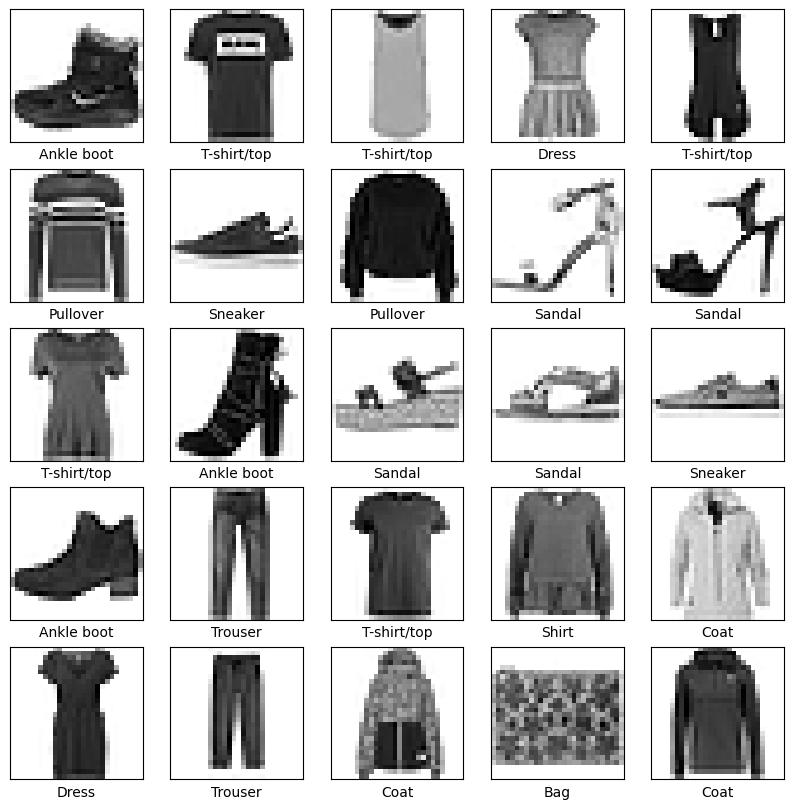

In [30]:
#202221876 김주환 중간고사 대체 과제 tensorflow 버전
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import gzip
import umap.umap_ as umap

# Fashion-MNIST 데이터셋 로드
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# t10k-labels-idx1-ubyte.gz 파일을 사용하여 테스트 레이블 데이터를 로드
with gzip.open('./t10k-labels-idx1-ubyte.gz', 'rb') as lbpath:
    test_labels = np.frombuffer(lbpath.read(), dtype=np.uint8, offset=8)

#t10k-images-idx3-ubyte.gz 파일을 사용하여 테스트 이미지 데이터를 로드
with gzip.open('./t10k-images-idx3-ubyte.gz', 'rb') as imgpath:
    test_images = np.fromb석
print("훈련 데이터 이미지 shape:", train_images.shape)
print("훈련 데이터 레이블 개수:", len(train_labels))
print("테스트 데이터 이미지 shape:", test_images.shape)
print("테스트 데이터 레이블 개수:", len(test_labels))

# 이미지 데이터 시각화 25개 https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data#the_classes_are Fashion-mnist의 클래스는 10개다
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.4464 - loss: 1.7684 - val_accuracy: 0.7273 - val_loss: 0.7893
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.7450 - loss: 0.7276 - val_accuracy: 0.7624 - val_loss: 0.6528
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 0.7786 - loss: 0.6163 - val_accuracy: 0.7770 - val_loss: 0.6001
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 32s 12ms/step - accuracy: 0.7947 - loss: 0.5680 - val_accuracy: 0.7944 - val_loss: 0.5655
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.8117 - loss: 0.5311 - val_accuracy: 0.8006 - val_loss: 0.5466


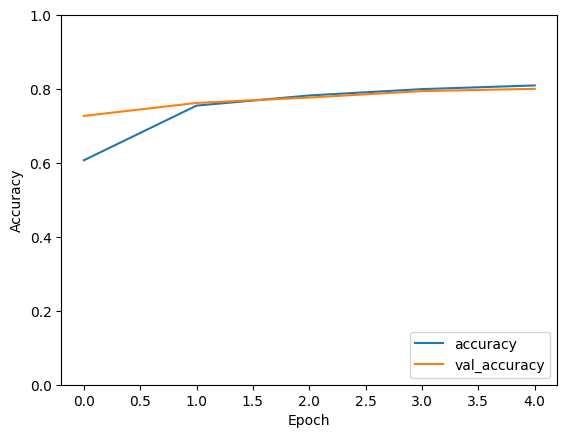

313/313 - 1s - 4ms/step - accuracy: 0.8006 - loss: 0.5466

테스트 정확도: 0.800599992275238


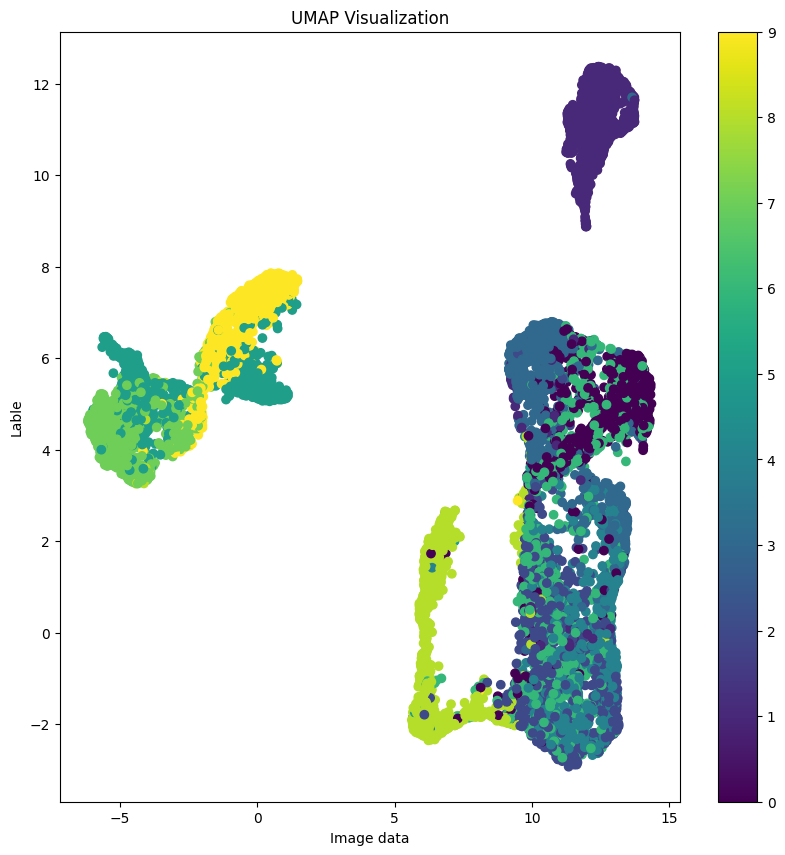

In [23]:

# 데이터 전처리 tensorflow의 feshion-mnist에는 60000개의 train_image가있고 testdata에는 10000개의 데이터가 있다
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

# 모델 구축
model = Sequential([ # 케라스의 Sequential 모델을 생성
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)), #맥스 풀링 레이어를 추가 맥스 풀링은 이미지를 다운샘플링하여 공간 차원을 줄이는 역할
    Flatten(), #평탄화 레이어를 추가 다차원 배열을 1차원으로 평탄화시켜주는 역할
    Dense(10, activation='softmax') #완전 연결 레이어를 추가 뉴런수 10개, 다중 클래스 분류사용 
])

# 모델 컴파일
model.compile(optimizer='adam', #옵티마이저 adam 설정, https://keras.io/api/optimizers/adam/
              loss='sparse_categorical_crossentropy', #손실함수 지정 다중 분류임으로 sparse_categorical_crossentropy 사용
              metrics=['accuracy']) #정확도로 평가지표지정 

# 모델 훈련
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(test_images, test_labels))
#모델 훈련용 이미지와 레이블 , 5번 반복 학습, 반복 1사이클마다 64개의 샘플 가중,평가 검증데이터 이미지와 레이블 사용

# 손실과 정확도 시각화
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()
# UMAP를 사용하여 이미지 데이터를 2차원으로 축소
reducer = umap.UMAP()
embedding = reducer.fit_transform(test_images.reshape(10000, 28*28))

# 모델 평가
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\n테스트 정확도:', test_acc)

# UMAP 시각화
plt.figure(figsize=(10, 10))
plt.scatter(embedding[:, 0], embedding[:, 1], c=test_labels, cmap='viridis')
plt.colorbar()
plt.xlabel('Image data')
plt.ylabel('Lable')
plt.title('UMAP Visualization')
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


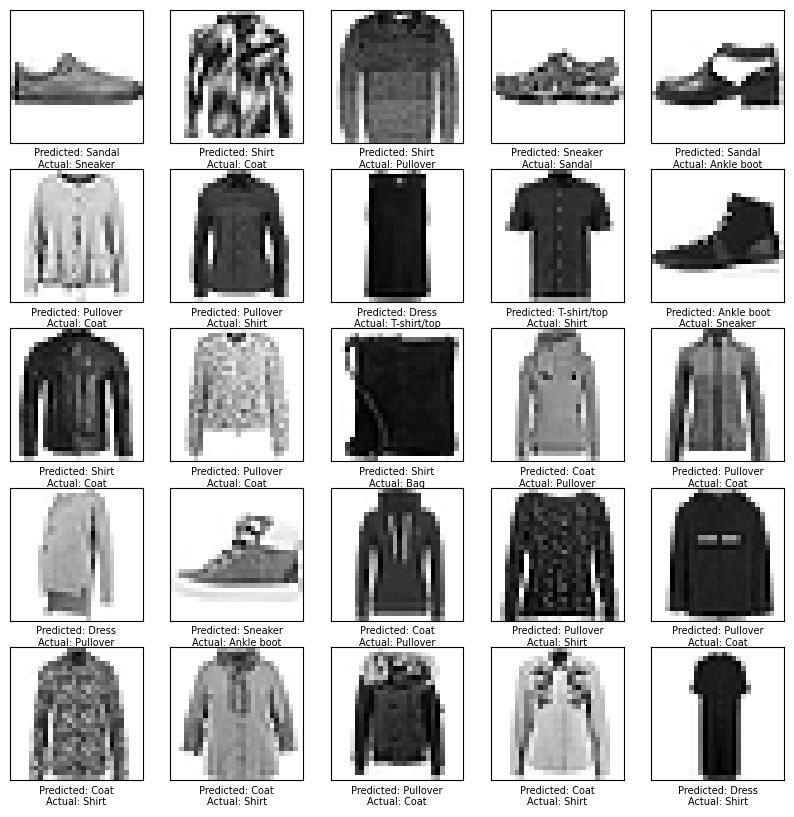

In [27]:
# 모델 예측
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

# 잘못 분류된 이미지 찾기
misclassified_indexes = np.where(predicted_labels != test_labels)[0]

# 잘못 분류된 이미지 및 예측값 시각화
plt.figure(figsize=(10, 10))
for i, index in enumerate(misclassified_indexes[:25]):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[index].reshape(28, 28), cmap=plt.cm.binary)

    plt.xlabel(f'Predicted: {class_names[predicted_labels[index]]}\nActual: {class_names[test_labels[index]]}', fontsize=7, wrap=True)



In [29]:
# 잘못 분류된 클래스 식별
misclassified_classes = [class_names[test_labels[index]] for index in misclassified_indexes]
most_common_misclassified_class = max(set(misclassified_classes), key=misclassified_classes.count)
print(f"가장 잘못 매칭된 클래스는: {most_common_misclassified_class}")


가장 잘못 매칭된 클래스는: Shirt
